In [107]:
# Análise Exploratória de Dados (EDA)
# Projeto: Kaggle House Prices
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [108]:
df = pd.read_csv("C:/house-price-analysis-ml/data/raw/train.csv")

df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [109]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [110]:
px.histogram(
    df, x="SalePrice", 
    nbins=50, 
    title="Distribuição do preço das casas"
)

In [111]:
def price_segment(price):
    
    if price <= 100000:
        return "Preço abaixo da média"
    elif price <=200000:
        return "Preço médio"
    else:
        return "Preço acima da média"
    
df["price_segment"] = df["SalePrice"].apply(price_segment)

In [112]:
df["price_segment"].value_counts()

price_segment
Preço médio              910
Preço acima da média     427
Preço abaixo da média    123
Name: count, dtype: int64

In [113]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

In [114]:
numeric_cols = numeric_cols.drop("SalePrice")

In [115]:
grouped_means = (
    df.groupby("price_segment")[numeric_cols].mean().T
)
grouped_means

price_segment,Preço abaixo da média,Preço acima da média,Preço médio
Id,698.747967,698.393443,749.857143
MSSubClass,66.016260,50.175644,58.818681
LotFrontage,55.389381,81.264957,66.956581
LotArea,7110.349593,13988.313817,9348.336264
OverallQual,4.398374,7.519906,5.662637
OverallCond,4.991870,5.386417,5.742857
YearBuilt,1941.203252,1992.140515,1965.537363
YearRemodAdd,1964.390244,1999.145199,1980.932967
MasVnrArea,30.886179,198.947867,69.234840
BsmtFinSF1,151.536585,634.751756,393.446154


In [116]:
main_features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "YearBuilt",
    "YearRemodAdd",
    "TotalBsmtSF",
    "FullBath",
    "BedroomAbvGr",
    "WoodDeckSF",
    "LotArea",
    "LotFrontage"
]


In [117]:
for col in main_features:
    fig = px.box(
        df, x="price_segment", y=col, title=f"{col} por Faixa de preço"
    )
    fig.show()

In [118]:
#Quais fatores diferenciam uma casa barata de uma casa cara?

grouped_means = df.groupby("price_segment")[main_features].mean().T
comparison = grouped_means[["Preço abaixo da média", "Preço acima da média"]]
comparison ["diff_percent"] = (
    (comparison["Preço acima da média"] - comparison["Preço abaixo da média"]) / comparison["Preço abaixo da média"]
) * 100

comparison.sort_values("diff_percent", ascending=False)

price_segment,Preço abaixo da média,Preço acima da média,diff_percent
WoodDeckSF,30.016260,142.709602,375.440981
GarageArea,234.934959,643.864169,174.060604
GarageCars,0.894309,2.360656,163.964232
TotalBsmtSF,609.788618,1393.077283,128.452490
GrLivArea,995.422764,1983.981265,99.310417
LotArea,7110.349593,13988.313817,96.731731
FullBath,1.113821,1.978923,77.669704
OverallQual,4.398374,7.519906,70.970144
LotFrontage,55.389381,81.264957,46.715772
BedroomAbvGr,2.341463,3.025761,29.225215


In [119]:
#Filtragem da casa grande 313 com preço médio:

df[
    (df["price_segment"] == "Preço médio") & (df["GrLivArea"] > 5000)
][[
    "SalePrice", "GrLivArea", "YearBuilt", "OverallQual", "GarageCars", "Neighborhood", "GarageArea", "YearRemodAdd", "Id", "OverallCond", "SaleCondition", "WoodDeckSF"
]]

,SalePrice,GrLivArea,YearBuilt,OverallQual,GarageCars,Neighborhood,GarageArea,YearRemodAdd,Id,OverallCond,SaleCondition,WoodDeckSF
1298,160000,5642,2008,10,2,Edwards,1418,2008,1299,5,Partial,214


In [120]:
df[
    df["OverallQual"] == 7
].groupby("price_segment")[main_features].mean()

,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,BedroomAbvGr,WoodDeckSF,LotArea,LotFrontage
price_segment,,,,,,,,,,,,
Preço abaixo da média,7.0,1411.000000,2.000000,544.000000,1977.000000,1977.000000,1386.000000,2.000000,3.000000,192.000000,11900.000000,85.000000
Preço acima da média,7.0,1884.186335,2.173913,583.850932,1991.248447,1998.279503,1243.484472,1.956522,3.068323,121.447205,13848.875776,79.053435
Preço médio,7.0,1520.751592,1.949045,480.477707,1985.286624,1994.445860,968.337580,1.828025,2.802548,79.318471,8226.821656,61.485075


In [121]:
px.box(df, x="Neighborhood", y="SalePrice", title="Distribuição de preços por bairro")

In [122]:
#Contagem de casas e preço médio por bairro
neighborhood_data = df.groupby('Neighborhood').agg(total_casas=('SalePrice', 'count'), preco_medio=('SalePrice', 'mean')).round(2).reset_index()
fig = px.bar(neighborhood_data, x="Neighborhood", y="total_casas", color="preco_medio", title="Quantidade de Casas por Bairro e Preço Médio", 
             labels={"total_casas": "Num de casas", "preco_medio": "Preço Médio ($)"}, color_continuous_scale="Rdpu", hover_data={"preco_medio": ":$,.2f"}
             )
fig.show()

In [123]:
#Qual o motivo de uma casa no NoRidge custar menos de 200k?
df[
    (df["Neighborhood"] == "NoRidge") & (df["SalePrice"] < 200000)
][[
    "SalePrice", "GrLivArea", "YearBuilt", "OverallQual", "GarageCars", "Neighborhood", "GarageArea", "YearRemodAdd", "Id", "OverallCond", "LotFrontage", "WoodDeckSF"
]]
#Conclusão, essa casa rprecisa de reforma pra subir o preço
#não interessa nenhum dos atributos de tamanho dela (mesmo que realmente seja um terreno grande), mas sim o fato de que não foram feitas reformas e no fim o terreno é grande, mas a casa em si é pequena.

,SalePrice,GrLivArea,YearBuilt,OverallQual,GarageCars,Neighborhood,GarageArea,YearRemodAdd,Id,OverallCond,LotFrontage,WoodDeckSF
1322,190000,1923,1992,7,2,NoRidge,564,1992,1323,5,107.0,240


In [131]:
# Comparando a 1323 com a média de NoRidge
comp_df = df[df['Neighborhood'] == 'NoRidge'][['SalePrice', 'GrLivArea', 'OverallQual', 'OverallCond']].mean().to_frame(name='Média NoRidge')
comp_df['Casa 1323'] = df[df['Id'] == 1323][['SalePrice', 'GrLivArea', 'OverallQual', 'OverallCond']].iloc[0]
comp_df['Diferença'] = comp_df['Casa 1323'] - comp_df['Média NoRidge']
comp_df.round(2)

,Média NoRidge,Casa 1323,Diferença
SalePrice,314028.41,190000,-124028.41
GrLivArea,2412.08,1923,-489.08
OverallQual,7.82,7,-0.82
OverallCond,5.21,5,-0.21


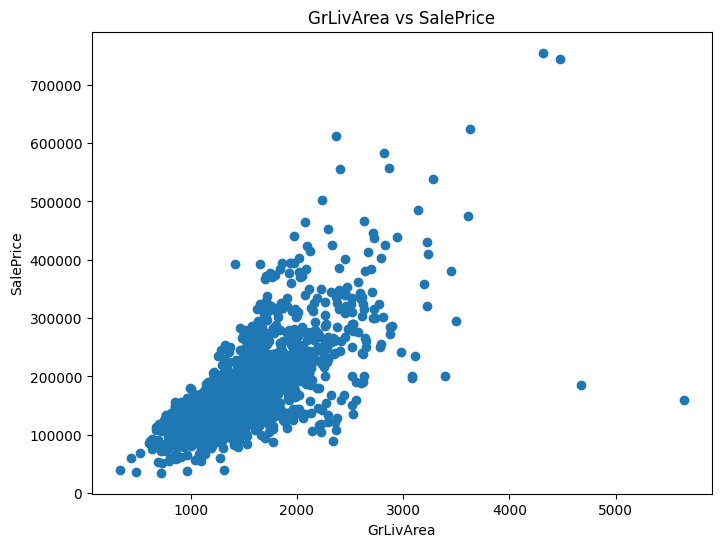

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')
plt.show()

In [126]:
casas_muito_caras = df[df['SalePrice'] > 700000][
    ['Id', 'SalePrice', 'GrLivArea', 'LotArea', 'Neighborhood', 'OverallQual', 'OverallCond', 'LotFrontage']
]
casas_muito_caras

,Id,SalePrice,GrLivArea,LotArea,Neighborhood,OverallQual,OverallCond,LotFrontage
691,692,755000,4316,21535,NoRidge,10,6,104.0
1182,1183,745000,4476,15623,NoRidge,10,5,160.0


In [127]:
casas_grandes = df[df['GrLivArea'] > 4000][
    ['Id', 'SalePrice', 'GrLivArea', 'LotArea', 'Neighborhood', 'OverallQual', 'LotFrontage']
]
casas_grandes

,Id,SalePrice,GrLivArea,LotArea,Neighborhood,OverallQual,LotFrontage
523,524,184750,4676,40094,Edwards,10,130.0
691,692,755000,4316,21535,NoRidge,10,104.0
1182,1183,745000,4476,15623,NoRidge,10,160.0
1298,1299,160000,5642,63887,Edwards,10,313.0


In [128]:
df = df[df['GrLivArea'] <= 4000]

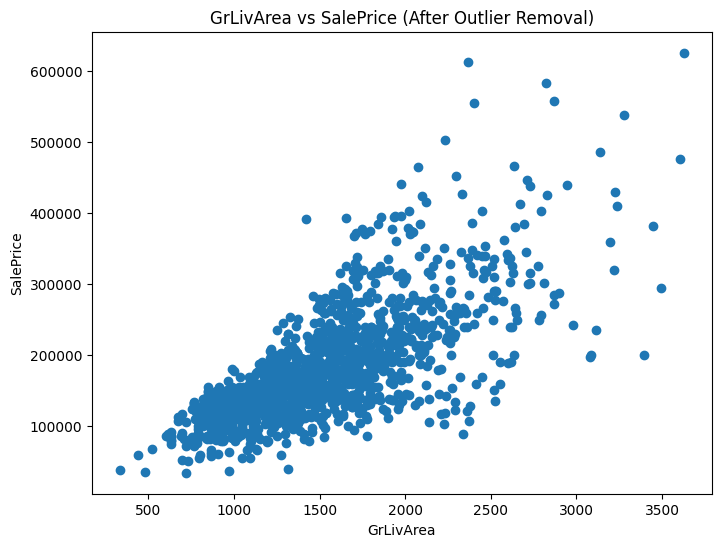

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice (After Outlier Removal)')
plt.show()